<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/AMIT_ARROR_STOKC_PREDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv('/content/sample_data/stock_data_last_6_months.csv')

In [19]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2024-07-30 09:15:00+05:30,3039.699951,3039.699951,3028.250000,3030.250000,3030.250000,0
1,2024-07-30 09:16:00+05:30,3033.699951,3034.649902,3030.899902,3030.899902,3030.899902,54667
2,2024-07-30 09:17:00+05:30,3030.750000,3031.149902,3028.250000,3028.949951,3028.949951,16507
3,2024-07-30 09:18:00+05:30,3031.600098,3032.000000,3030.500000,3031.149902,3031.149902,23502
4,2024-07-30 09:19:00+05:30,3031.149902,3031.250000,3028.899902,3028.949951,3028.949951,15744
...,...,...,...,...,...,...,...
6731,2024-08-23 15:25:00+05:30,2999.750000,3001.350098,2999.050049,2999.050049,2999.050049,37205
6732,2024-08-23 15:26:00+05:30,2999.699951,3000.649902,2998.949951,2998.949951,2998.949951,20315
6733,2024-08-23 15:27:00+05:30,2998.949951,3001.000000,2998.050049,2999.600098,2999.600098,27721
6734,2024-08-23 15:28:00+05:30,3000.000000,3002.000000,2999.000000,2999.000000,2999.000000,24266


In [20]:
df.isnull().sum()

,0
Datetime,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error


In [22]:
# Load the dataset
file_path = '/content/sample_data/stock_data_last_6_months.csv'
stock_data = pd.read_csv(file_path)

# Convert 'Datetime' to datetime type and set it as the index
stock_data['Datetime'] = pd.to_datetime(stock_data['Datetime'])
stock_data.set_index('Datetime', inplace=True)

# Select relevant columns for prediction
# Here we use Open, High, Low, Close, Adj Close, and Volume
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)


In [23]:
# Function to create sequences for time series
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Use all columns except the target 'Close'
        y.append(data[i+time_steps, 3])  # Target is the 'Close' price
    return np.array(X), np.array(y)

# Set time steps to 12 (past 1 hour data)
time_steps = 12
X, y = create_sequences(scaled_data, time_steps)

# Split into train and test sets
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [24]:
# Build the LSTM model
model = Sequential()

# Adding the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Adding a second LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))  # Predicting the 'Close' price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)


Epoch 1/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0823 - val_loss: 4.6449e-04
Epoch 2/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0064 - val_loss: 2.6812e-04
Epoch 3/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0049 - val_loss: 2.9935e-04
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0052 - val_loss: 4.7306e-04
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0049 - val_loss: 5.0110e-04
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0045 - val_loss: 7.0205e-04
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0050 - val_loss: 9.2161e-04
Epoch 8/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0049 - val_loss: 5.4454e-04
Epoch 9/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 10/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0052 - val_loss: 0.0017
Epoch 11/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0054 - val_loss: 0.0015
Epoch 12/

In [26]:
# Predict on test data
predicted_prices = model.predict(X_test)

# Inverse scale the predictions and the actual values
predicted_prices = scaler.inverse_transform(np.concatenate([X_test[:, -1], predicted_prices], axis=1))[:, -1]
y_test_real = scaler.inverse_transform(np.concatenate([X_test[:, -1], y_test.reshape(-1, 1)], axis=1))[:, -1]

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_real, predicted_prices))
print(f"Test RMSE: {rmse}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Test RMSE: 11948.802661710919


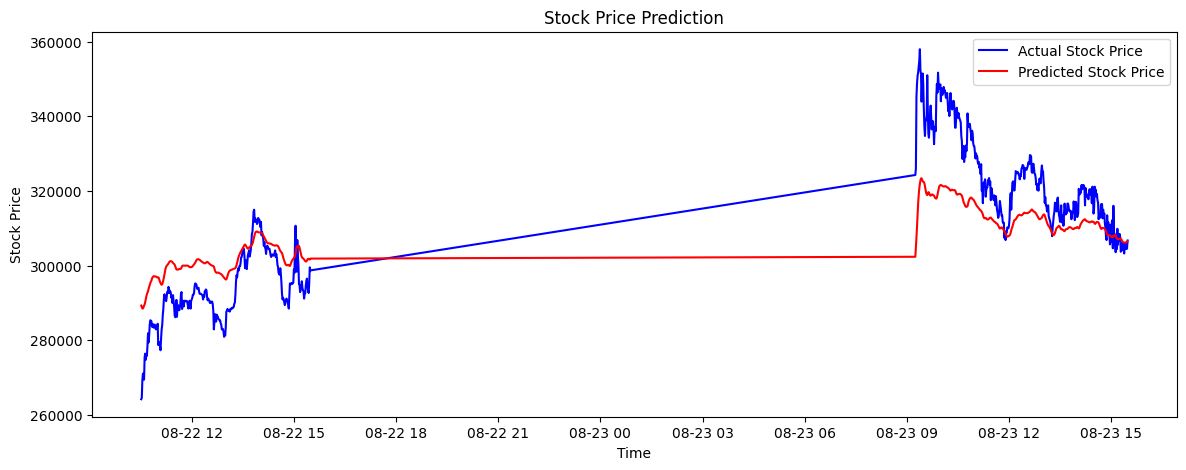

In [27]:
# Plot the actual vs predicted prices
plt.figure(figsize=(14,5))
plt.plot(stock_data.index[-len(y_test):], y_test_real, color='blue', label='Actual Stock Price')
plt.plot(stock_data.index[-len(y_test):], predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [28]:
# Data Preprocessing

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Loading data again
stock_data = pd.read_csv('/content/sample_data/stock_data_last_6_months.csv')

# Sort by date to ensure chronological order
stock_data = stock_data.sort_values(by='Datetime')

# Add moving averages as new features (for feature engineering)
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()  # 20-period moving average
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()  #

In [29]:
# Fill NaNs created by rolling windows
stock_data.fillna(method='bfill', inplace=True)

<ipython-input-29-f97ce9c40064>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='bfill', inplace=True)


In [30]:
# Scaling
scaler = MinMaxScaler(feature_range=(0,1))

# Choose relevant columns: we'll include the new moving averages in the feature set
scaled_data = scaler.fit_transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA20', 'MA50']])

# Split data into training and test sets (80% training, 20% test)
training_data_len = int(np.ceil(0.8 * len(scaled_data)))
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len:]

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Create function to prepare dataset for LSTM (with more time steps)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), :])  # use all features for X
        y.append(data[i + time_step, 3])    # predict 'Close' price (index 3)
    return np.array(X), np.array(y)

# Creating datasets for training
X_train, y_train = create_dataset(train_data, time_step=60)
X_test, y_test = create_dataset(test_data, time_step=60)

# Reshape data into LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the LSTM model
model = Sequential()

# Adding layers with Dropout to prevent overfitting
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))  # Output only 1 value (next predicted price)

# Compile model with reduced learning rate for better convergence
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 25s 226ms/step - loss: 0.0299 - val_loss: 5.8513e-04
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - loss: 0.0034 - val_loss: 5.4832e-04
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - loss: 0.0028 - val_loss: 6.6379e-04
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - loss: 0.0030 - val_loss: 2.2179e-04
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - loss: 0.0026 - val_loss: 2.0745e-04
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - loss: 0.0024 - val_loss: 2.0201e-04
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 236ms/step - loss: 0.0023 - val_loss: 6.6771e-04
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - loss: 0.0021 - val_loss: 1.7015e-04
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 22s 232ms/step - loss: 0.0019 - val_loss: 2.6083e-04
Epoch

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


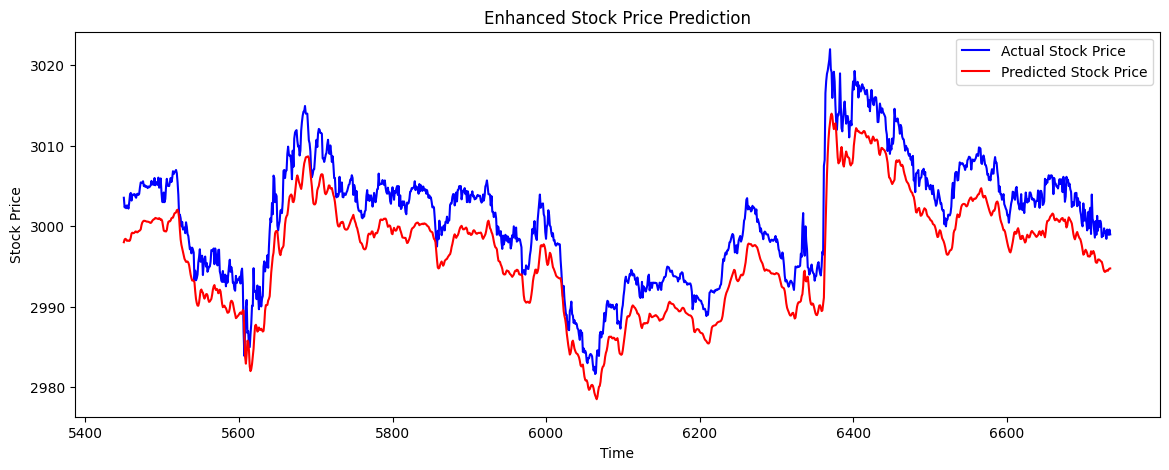

In [34]:
# Predicting and scaling back the predicted values
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform([[0, 0, 0, pred, 0, 0, 0] for pred in predicted_prices[:, 0]])[:, 3]

# Visualizing
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

# Adjust the slicing to match the length of y_test
# The original slicing was causing the mismatch in dimensions.
# Using y_test to determine the length ensures that the 'Actual' and 'Predicted' arrays have the same number of elements.
plt.plot(stock_data.index[-len(y_test):], scaler.inverse_transform(test_data[60:60+len(y_test)])[:, 3], color='blue', label='Actual Stock Price')

plt.plot(stock_data.index[-len(y_test):], predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Enhanced Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [37]:
# Ensure the lengths of actual and predicted data are the same
actual_prices = scaler.inverse_transform(test_data)[:, 3][-len(predicted_prices):]  # Adjust the test data to match the length of predicted prices

# Calculate MAE
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R² Score
r2 = r2_score(actual_prices, predicted_prices)
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 4.440783216182015
R² Score: 0.5776784778423812


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

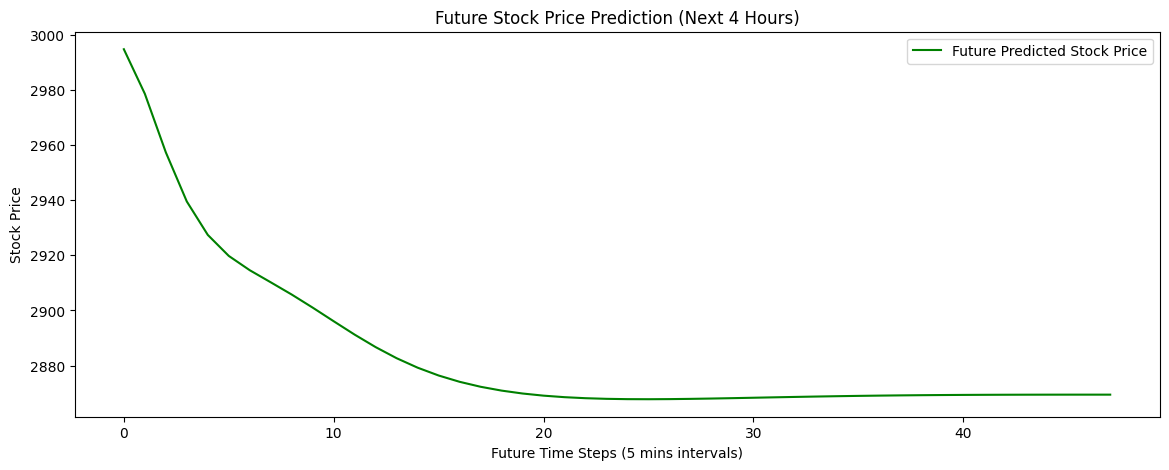

Predicted Stock Prices for the Next 4 Hours (5-minute intervals): 
[2994.7685005664825, 2978.612463235855, 2957.372022986412, 2939.5364478826523, 2927.4173370599747, 2919.7963790893555, 2914.6053290367126, 2910.222545146942, 2905.7802597284317, 2901.0311536192894, 2896.0958353877068, 2891.2365944981575, 2886.708143055439, 2882.68638753891, 2879.253979206085, 2876.417079746723, 2874.1322101950645, 2872.3314346671104, 2870.940086066723, 2869.8873863220215, 2869.1111490130424, 2868.5587828159332, 2868.1866243481636, 2867.9583706259727, 2867.8436742424965, 2867.8170097470284, 2867.8566105365753, 2867.9442247748375, 2868.0644428133965, 2868.2045778632164, 2868.3543297052383, 2868.5056762099266, 2868.6524990797043, 2868.790372312069, 2868.916404902935, 2869.0288177728653, 2869.126824438572, 2869.2104140520096, 2869.280058503151, 2869.3367286920547, 2869.381509423256, 2869.4157838225365, 2869.440907895565, 2869.458259344101, 2869.469123661518, 2869.474759221077, 2869.476256251335, 2869.474623

In [39]:
def predict_future_prices(model, last_sequence, time_steps=60, future_steps=48):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        # Make prediction on the current sequence
        next_pred = model.predict(current_sequence.reshape((1, current_sequence.shape[0], current_sequence.shape[1])))

        # Unscale the prediction to get the actual stock price
        next_pred_value = scaler.inverse_transform([[0, 0, 0, next_pred[0][0], 0, 0, 0]])[0][3]  # Unscale the prediction

        # Append the predicted price
        future_predictions.append(next_pred_value)

        # Shift the current sequence by removing the first element and adding the predicted one
        next_pred_reshaped = np.array([[0, 0, 0, next_pred[0][0], 0, 0, 0]])  # Reshape to match the input format
        next_sequence = np.append(current_sequence[1:], next_pred_reshaped, axis=0)  # Append the prediction correctly
        current_sequence = next_sequence

    return future_predictions

# Use the last available sequence from the test set
last_sequence = X_test[-1]  # Last available sequence for making future predictions

# Predict the next 48 time steps (~4 hours in 5-minute intervals)
future_predictions = predict_future_prices(model, last_sequence, time_steps=60, future_steps=48)

# Visualizing the future predictions
plt.figure(figsize=(14,5))
plt.plot(range(len(future_predictions)), future_predictions, color='green', label='Future Predicted Stock Price')
plt.title('Future Stock Price Prediction (Next 4 Hours)')
plt.xlabel('Future Time Steps (5 mins intervals)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the predicted prices for the next 4 hours
print(f"Predicted Stock Prices for the Next 4 Hours (5-minute intervals): \n{future_predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

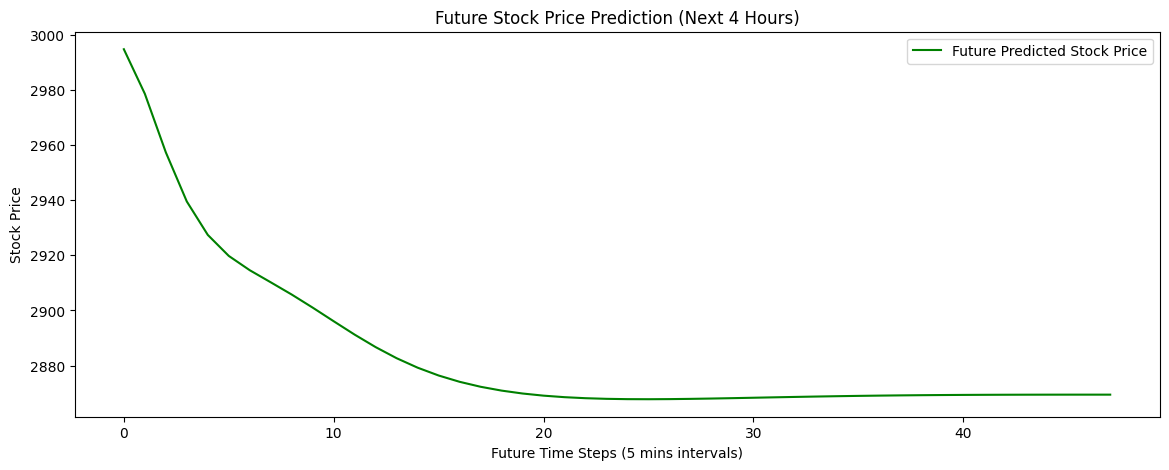

Predicted Stock Prices for the Next 4 Hours (5-minute intervals):
Time Step 1: 2994.77
Time Step 2: 2978.61
Time Step 3: 2957.37
Time Step 4: 2939.54
Time Step 5: 2927.42
Time Step 6: 2919.80
Time Step 7: 2914.61
Time Step 8: 2910.22
Time Step 9: 2905.78
Time Step 10: 2901.03
Time Step 11: 2896.10
Time Step 12: 2891.24
Time Step 13: 2886.71
Time Step 14: 2882.69
Time Step 15: 2879.25
Time Step 16: 2876.42
Time Step 17: 2874.13
Time Step 18: 2872.33
Time Step 19: 2870.94
Time Step 20: 2869.89
Time Step 21: 2869.11
Time Step 22: 2868.56
Time Step 23: 2868.19
Time Step 24: 2867.96
Time Step 25: 2867.84
Time Step 26: 2867.82
Time Step 27: 2867.86
Time Step 28: 2867.94
Time Step 29: 2868.06
Time Step 30: 2868.20
Time Step 31: 2868.35
Time Step 32: 2868.51
Time Step 33: 2868.65
Time Step 34: 2868.79
Time Step 35: 2868.92
Time Step 36: 2869.03
Time Step 37: 2869.13
Time Step 38: 2869.21
Time Step 39: 2869.28
Time Step 40: 2869.34
Time Step 41: 2869.38
Time Step 42: 2869.42
Time Step 43: 2869.

In [40]:
def predict_future_prices(model, last_sequence, time_steps=60, future_steps=48):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        # Make prediction on the current sequence
        next_pred = model.predict(current_sequence.reshape((1, current_sequence.shape[0], current_sequence.shape[1])))

        # Unscale the prediction to get the actual stock price
        next_pred_value = scaler.inverse_transform([[0, 0, 0, next_pred[0][0], 0, 0, 0]])[0][3]  # Unscale the prediction

        # Append the predicted price
        future_predictions.append(next_pred_value)

        # Shift the current sequence by removing the first element and adding the predicted one
        next_pred_reshaped = np.array([[0, 0, 0, next_pred[0][0], 0, 0, 0]])  # Reshape to match the input format
        next_sequence = np.append(current_sequence[1:], next_pred_reshaped, axis=0)  # Append the prediction correctly
        current_sequence = next_sequence

    return future_predictions

# Use the last available sequence from the test set
last_sequence = X_test[-1]  # Last available sequence for making future predictions

# Predict the next 48 time steps (~4 hours in 5-minute intervals)
future_predictions = predict_future_prices(model, last_sequence, time_steps=60, future_steps=48)

# Visualizing the future predictions
plt.figure(figsize=(14,5))
plt.plot(range(len(future_predictions)), future_predictions, color='green', label='Future Predicted Stock Price')
plt.title('Future Stock Price Prediction (Next 4 Hours)')
plt.xlabel('Future Time Steps (5 mins intervals)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Display the predicted stock prices in a clear format
print("Predicted Stock Prices for the Next 4 Hours (5-minute intervals):")
for i, price in enumerate(future_predictions, 1):
    print(f"Time Step {i}: {price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

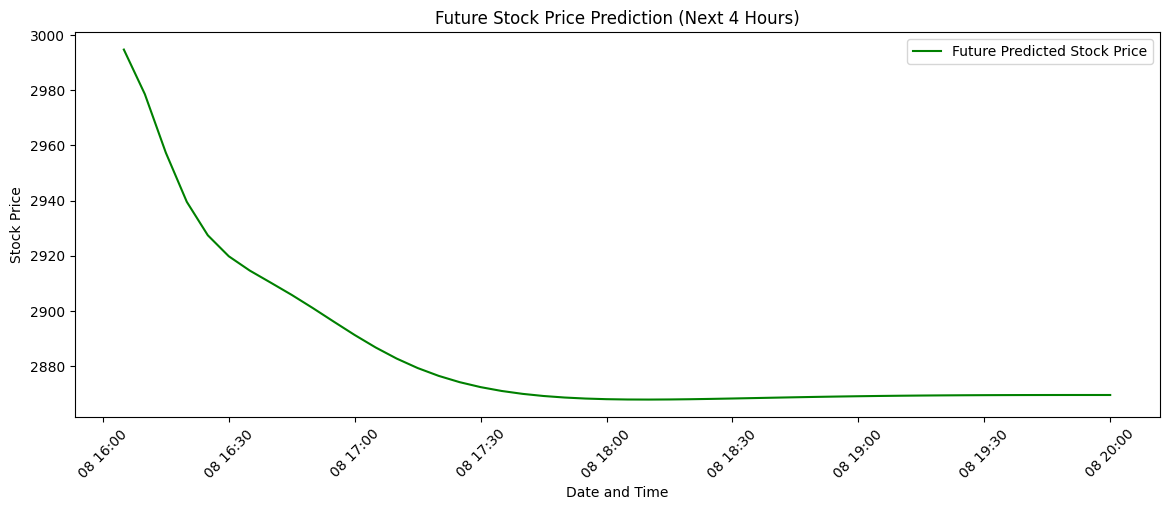

Predicted Stock Prices for the Next 4 Hours (5-minute intervals):
2024-09-08 16:05:00: 2994.77
2024-09-08 16:10:00: 2978.61
2024-09-08 16:15:00: 2957.37
2024-09-08 16:20:00: 2939.54
2024-09-08 16:25:00: 2927.42
2024-09-08 16:30:00: 2919.80
2024-09-08 16:35:00: 2914.61
2024-09-08 16:40:00: 2910.22
2024-09-08 16:45:00: 2905.78
2024-09-08 16:50:00: 2901.03
2024-09-08 16:55:00: 2896.10
2024-09-08 17:00:00: 2891.24
2024-09-08 17:05:00: 2886.71
2024-09-08 17:10:00: 2882.69
2024-09-08 17:15:00: 2879.25
2024-09-08 17:20:00: 2876.42
2024-09-08 17:25:00: 2874.13
2024-09-08 17:30:00: 2872.33
2024-09-08 17:35:00: 2870.94
2024-09-08 17:40:00: 2869.89
2024-09-08 17:45:00: 2869.11
2024-09-08 17:50:00: 2868.56
2024-09-08 17:55:00: 2868.19
2024-09-08 18:00:00: 2867.96
2024-09-08 18:05:00: 2867.84
2024-09-08 18:10:00: 2867.82
2024-09-08 18:15:00: 2867.86
2024-09-08 18:20:00: 2867.94
2024-09-08 18:25:00: 2868.06
2024-09-08 18:30:00: 2868.20
2024-09-08 18:35:00: 2868.35
2024-09-08 18:40:00: 2868.51
2024-0

In [41]:
from datetime import timedelta

def predict_future_prices_with_time(model, last_sequence, last_date_time, time_steps=60, future_steps=48):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        # Make prediction on the current sequence
        next_pred = model.predict(current_sequence.reshape((1, current_sequence.shape[0], current_sequence.shape[1])))

        # Unscale the prediction to get the actual stock price
        next_pred_value = scaler.inverse_transform([[0, 0, 0, next_pred[0][0], 0, 0, 0]])[0][3]

        # Append the predicted price
        future_predictions.append(next_pred_value)

        # Shift the current sequence by removing the first element and adding the predicted one
        next_pred_reshaped = np.array([[0, 0, 0, next_pred[0][0], 0, 0, 0]])  # Reshape to match the input format
        next_sequence = np.append(current_sequence[1:], next_pred_reshaped, axis=0)
        current_sequence = next_sequence

    # Generate timestamps for future predictions (assuming 5-minute intervals)
    future_dates = [last_date_time + timedelta(minutes=5 * i) for i in range(1, future_steps + 1)]

    return future_predictions, future_dates

# Assuming `last_date_time` is the timestamp of the last entry in your test set
last_date_time = pd.to_datetime('2024-09-08 16:00:00')  # Replace with actual date and time of the last value

# Use the last available sequence from the test set
last_sequence = X_test[-1]  # Last available sequence for making future predictions

# Predict the next 48 time steps (~4 hours in 5-minute intervals)
future_predictions, future_dates = predict_future_prices_with_time(model, last_sequence, last_date_time, time_steps=60, future_steps=48)

# Visualizing the future predictions
plt.figure(figsize=(14,5))
plt.plot(future_dates, future_predictions, color='green', label='Future Predicted Stock Price')
plt.title('Future Stock Price Prediction (Next 4 Hours)')
plt.xlabel('Date and Time')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.show()

# Display the predicted stock prices with corresponding timestamps
print("Predicted Stock Prices for the Next 4 Hours (5-minute intervals):")
for date, price in zip(future_dates, future_predictions):
    print(f"{date}: {price:.2f}")


In [43]:
# Saving the model
model.save('lstm_stock_price_model.h5')

# To load the model again:
# from tensorflow.keras.models import load_model
# model = load_model('lstm_stock_price_model.h5')


In [44]:
# To load the model again:
# from tensorflow.keras.models import load_model
# model = load_model('lstm_stock_price_model.h5')